# K-Means

Ruixuan Dong

---

## Table of Contents
 - [Introduction to unsupervised learning](#1)
 - [K-Means Clustering](#2)
     - [Stacking](#21)
     - [Choosing the Right $k$](#22)
     - [Challenges and Considerations](#23)
 - [Simulated Dataset](#3)
 - [Evaluating the Performance of K-Means Clustering](#4)

<a name='1'></a>
## 1-Introduction to Unsupervised Learning
Unsupervised learning is a branch of machine learning that focuses on identifying patterns in data. The data used in unsupervised learning is not labeled, meaning the outcomes are not known beforehand. This form of learning is akin to self-learning, where the algorithm tries to learn the structure and distribution of data without any guidance. Unsupervised learning involves several techniques, including but not limited to:

1. **Clustering**: This technique groups similar items together. Clustering algorithms, such as K-means, hierarchical clustering, and DBSCAN, are used for market segmentation, social network analysis, and image segmentation.

2. **Association**: This technique is about discovering rules that describe parts of your data. For example, in market basket analysis, the Apriori algorithm can find items frequently bought together.

3. **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) reduce the number of variables under consideration, simplifying the models while retaining the essential information.

#### Supervised Learning
- **Data**: Labeled data (input-output pairs).
- **Techniques**: Classification, regression.
- **Objective**: Predict or classify new data points based on learned mappings.
- **Evaluation**: Easier to validate and assess using accuracy, precision, and recall.

#### Unsupervised Learning
- **Data**: Unlabeled data.
- **Techniques**: Clustering, association, dimensionality reduction.
- **Objective**: Discover underlying patterns or data groupings without any prior knowledge of what patterns exist.
- **Evaluation**: More subjective and difficult, often relying on metrics like the silhouette score or inertia in clustering.

Unsupervised learning provides a unique approach to explore and analyze data without predefined labels. It is particularly useful in scenarios where you want to uncover hidden patterns or groupings in your data. However, it requires careful consideration in terms of data preparation, algorithm selection, and result interpretation.


<a name='2'></a>
## 2-K-Means Clustering
K-means clustering is a fundamental unsupervised learning algorithm used extensively in data analysis and pattern recognition. It aims to partition a dataset into $k$ distinct, non-overlapping subgroups (clusters) where each data point belongs to only one group. The beauty of K-means lies in its simplicity and efficiency, making it highly applicable in various fields, from image segmentation and customer segmentation to document clustering. The core idea behind K-means is to identify $k$ centroids, one for each cluster, and then allocate every data point to the nearest cluster, while keeping the centroids as small as possible. This process iteratively minimizes the within-cluster variances, also known as squared Euclidean distances, though other distance metrics can also be used.

The goal of K-means is to minimize the variance within each cluster. The objective function is defined as:
$$
J = \sum_{i=1}^{k} \sum_{x \in S_i} \| x - \mu_i \|^2
$$
where:
- $J$ is the objective function.
- $k$ is the number of clusters.
- $S_i$ is the set of points in the $i$-th cluster.
- $x$ is a data point in cluster $S_i$.
- $\mu_i$ is the mean of points in $S_i$.


<a name='21'></a>
### 2-1 Algorithm
The K-means algorithm consists of the following steps:

1. **Initialization**: Randomly select $k$ data points as the initial centroids.

2. **Assignment Step**:
   Assign each data point to the nearest centroid based on the Euclidean distance. The assignment $S_i^{(t)}$ of data point $x$ at iteration $t$ is:
   $$
   S_i^{(t)} = \{ x : \| x - \mu_i^{(t)} \| \le \| x - \mu_j^{(t)} \|, \forall j, 1 \le j \le k \}
   $$

3. **Update Step**:
   Calculate new centroids as the mean of all points assigned to each cluster.
   $$
   \mu_i^{(t+1)} = \frac{1}{|S_i^{(t)}|} \sum_{x \in S_i^{(t)}} x
   $$

4. **Repeat**:
   Repeat steps 2 and 3 until the centroids no longer change significantly or a predetermined number of iterations is reached.
   
The above two steps are repeated until the algorithm converges, meaning the assignments no longer change or the change is below a certain threshold. The final output is a set of clusters with minimized within-cluster variances.

<a name='22'></a>
### 2-2 Choosing the Right $k$
- **Elbow Method**: Plot the sum of squared distances of samples to their closest cluster center and find the ‘elbow’ point.
- **Silhouette Method**: Analyze the silhouette score for different values of $k$ to determine the best number of clusters.

<a name='23'></a>
### 2-3 Challenges and Considerations:
- **Selection of $k$**: Determining the right number of clusters ($k$) is not straightforward and often requires domain knowledge or methods like the Elbow Method.
- **Initial Centroid Placement**: The algorithm's performance can significantly vary based on the initial centroid positions. Various initialization methods, like the k-means++ algorithm, are employed to tackle this issue.
- **Sensitivity to Scales**: K-means can be sensitive to the scale of the data, and hence normalization or standardization can be crucial.
- **Applicability**: While K-means is powerful for a wide range of applications, it assumes clusters of similar sizes and spherical shapes, which might not be the case in all datasets.

In summary, K-means clustering is a versatile and straightforward tool in the field of machine learning and data analysis, known for its ease of implementation and effectiveness in grouping data into distinct clusters based on their intrinsic properties.

<a name='3'></a>

## 3-Simulated Data

In this part, we use the dataset generated by Synthetic SCG data generator https://github.com/wsonguga/DataDemo. In the data file, each row includes sensor data (10 seconds * 100Hz) + HeartRate + RespiratoryRate + SystolicBloodPressure + DiastolicBloodPressure.

Now we would like to give a introduction about the synthetic SCG dataset we generated. 

Based on Synthetic SCG data generator, we generated an artificial (synthetic) scg signal of a given duration (10 seconds, i.e. duration=10) and sampling rate (100Hz, i.e. sampling rate=100) using a model based on Daubechies wavelets to roughly approximate cardiac cycles.

Besides, we set 
 - heart rate to be randomly chosen from the intgers range from 50 to 150, with the desired heart rate standard deviation (beats per minute) equal to 1.
 - respiratory rate to be randomly chosen from the intgers range from 10 to 30
 - diastolic blood pressure to be randomly chosen from the intgers range from 60 to 99
 - systolic blood pressure to be randomly chosen from the intgers range from 100 to 160

The sample size of the current dataset is 6,000 in total.


**Problem Statement:** The generated dataset containing: 
- a dataset set ("lower.csv") of 3,000 samples labeled as lower (100<=systolic blood pressure<140) 
- a dataset set ("higher.csv") of 3,000 samples labeled as higher (140<=systolic blood pressure<=160) 
- each sample is of shape (1, 1003) where 1003 is for the 1000-d signal and heart rate, respiratory rate and diastolic blood pressure

In this part, we will build a simple kNN classifier that can correctly classify samples as lower or higher (SBP).

Let's get more familiar with the dataset. Load the data by running the following code.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
column_names = [str(i) for i in range(1, 1001)] + ['heart_rate', 'respiratory_rate', 'systolic', 'diastolic']
total = pd.read_csv('total_large.csv', 
                     header=None, 
                     names=column_names)
total.head(3)

,1,2,3,4,5,6,7,8,9,10,...,995,996,997,998,999,1000,heart_rate,respiratory_rate,systolic,diastolic
0,5.439234e-08,2.583753e-07,0.000001,0.000004,0.000008,0.000006,-4.897503e-07,-0.000004,-2.029141e-07,3.029687e-06,...,-3.750468e-08,-3.504179e-08,-3.266654e-08,-2.969555e-08,-2.688206e-08,-2.599564e-08,109.0,19.0,160.0,66.0
1,5.781177e-08,3.850786e-07,0.000002,0.000007,0.000007,-0.000001,-3.642447e-06,0.000002,8.308896e-07,-1.850758e-06,...,-3.937486e-08,-3.615418e-08,-3.250324e-08,-2.930146e-08,-2.813366e-08,-2.915194e-08,131.0,15.0,153.0,64.0
2,3.434446e-08,2.098668e-07,0.000003,0.000006,-0.000003,0.000002,-1.939304e-06,0.000001,-9.990558e-07,3.452373e-07,...,-3.199401e-08,-2.472291e-08,-1.890941e-08,-1.882332e-08,-2.188260e-08,-2.335538e-08,128.0,14.0,120.0,85.0


In [23]:
def signal2matrix(total):
    total = total.values

    numberOfLines = len(total)
    returnMat = np.zeros((numberOfLines, 1003))
    classLabelVector = []
    index = 0

    for line in total:
        returnMat[index, :1002] = line[:1002]
        returnMat[index, 1002] = line[1003]
        if 100 <=line[1002]< 140:
            classLabelVector.append(0)
        elif 140 <=line[1002]<= 160:
            classLabelVector.append(1)
        index += 1
    return returnMat, classLabelVector

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [24]:
feature_matrix, class_labels = signal2matrix(total)
norm_feature_matrix, ranges, minVals = autoNorm(feature_matrix)
np.shape(feature_matrix)
np.shape(class_labels)

(15000,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    norm_feature_matrix, class_labels, test_size=0.3, random_state=42)


np.shape(X_train)

(10500, 1003)

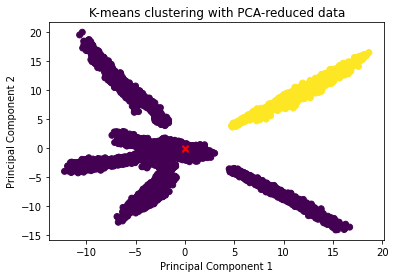

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = X_train  

# Standardize the dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Dimensionality reduction
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)

k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Plot centroids
plt.title('K-means clustering with PCA-reduced data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<a name='4'></a>
## 4-Evaluating the Performance of K-Means Clustering

Evaluating the performance of K-means clustering, particularly when labels are available for the dataset, involves comparing the clustering results with the actual labels. This process can provide insights into how well the clustering has captured the inherent groupings in the data. Below are some common metrics and methods used for this evaluation.

### 1. Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model. However, it can also be adapted for evaluating clustering by comparing the cluster assignments with the actual labels.

- Assign each cluster to the most frequent class in that cluster.
- Count the number of data points from each class assigned to each cluster.
- Present these counts in a matrix format.

### 2. Purity
Purity is a straightforward measure that evaluates the extent to which each cluster contains data points from primarily one class.

- Assign each cluster to the class which is most frequent in the cluster.
- Count the number of correctly assigned points and divide by the total number of points.

### 3. Adjusted Rand Index (ARI)
ARI is a measure that considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusterings.

**Benefits**
- Random labeling will have an ARI close to 0.0.
- Perfect labeling is scored 1.0.
- It's symmetric, so swapping the label and cluster assignments doesn't change the score.

### 4. Normalized Mutual Information (NMI)
NMI is an adjustment of the Mutual Information (MI) score that accounts for chance. It measures the agreement of the two assignments, ignoring permutations.

**Advantages**
- Normalization allows for comparison between clusterings of different numbers of clusters.
- It's a balanced measure which is suitable for situations where cluster sizes can vary greatly.

### 5. Silhouette Score
This measure calculates how similar a data point is to its own cluster compared to other clusters.

**Interpretation**
- A high silhouette score indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters.
- If many points have a high value, the clustering configuration is appropriate.
- If many points have a low or negative value, the clustering configuration may have too many or too few clusters.


In [27]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming 'labels' are your cluster labels from K-means
true_labels = y_train

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, labels)
print("Confusion Matrix:\n", conf_matrix)

# Adjusted Rand Index
ari = adjusted_rand_score(true_labels, labels)
print("Adjusted Rand Index:", ari)

# Normalized Mutual Information
nmi = normalized_mutual_info_score(true_labels, labels)
print("Normalized Mutual Information:", nmi)

# Silhouette Score
# Note: Silhouette score is usually used without true labels,
# but it gives an idea about the quality of the clustering
sil_score = silhouette_score(data, labels)
print("Silhouette Score:", sil_score)


Confusion Matrix:
 [[6035  834]
 [3217  414]]
Adjusted Rand Index: -0.003321906413446674
Normalized Mutual Information: 0.00011774883898188853
Silhouette Score: 0.029777921097834607


Based on the provided evaluation metrics, the performance of the K-means clustering can be summarized as follows:

1. **Confusion Matrix**: Significant misclassification indicates poor clustering.
2. **Adjusted Rand Index (ARI)**: Nearly zero (-0.0033), suggesting clustering is comparable to random assignment.
3. **Normalized Mutual Information (NMI)**: Extremely low (0.00012), indicating minimal correspondence between clustering and actual labels.
4. **Silhouette Score**: Very low (0.0298), implying significant overlap and poor cluster separation.

The results suggest suboptimal performance of the K-means model on the dataset. This may require revising the number of clusters, exploring different features, or considering alternative clustering methods.
